I wanted to see the political inclination of two Indian media houses- The Hindu and Times of India (TOI). The event I considered for the analysis was the Delhi riots of 2020. I used google news API to get the articles about delhi riots published by the two media houses. I individually applied the basic tools on both the corpora of articles but no significant difference was observed for predicting their political inclination. The two notebooks can be found here- [TOI](https://colab.research.google.com/drive/1TW50ivzs1Qs9vD2hTeuwtcmIu5765051?usp=sharing),  [The Hindu](https://colab.research.google.com/drive/1zSn-_DnKfKDHapklV2qsmlirsaI7Ptz5?usp=sharing)
Then I combined both the corpora of articles and applied some tools which gave an overview or the summary of Delhi riots


In [ ]:
# !pip install pygooglenews
# from pygooglenews import GoogleNews

In [ ]:
import sys
sys.stdout.write("hello from Python %sn" % (sys.version,))
import http.client
import json
import datetime
import re
import random

hello from Python 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]n

##API

In [ ]:
#source parameter, smaple links- 10 each and extract body of the article, formate as csv- source, title and article
conn = http.client.HTTPSConnection("google-news.p.rapidapi.com")
headers = {
    'x-rapidapi-host': "google-news.p.rapidapi.com",
    'x-rapidapi-key': "b157ecc5c1msha83f14d12d17ea0p1112ecjsn21f260e65236"
    }
query = "Delhi%20riots" #shahrukh khan, rrr, kgf2

# conn.request("GET", "/v1/search?when=1y&country=In&lang=en&q="+query, headers=headers)
# conn.request("GET", "/v1/source_search?source=timesofindia.indiatimes.com/&to=2022-03-31&from=2020-01-01&country=In&lang=en&q="+query, headers=headers)
conn.request("GET", "/v1/source_search?source=thehindu.com/&to=2022-03-31&from=2020-02-01&country=In&lang=en&q="+query, headers=headers)
# conn.request("GET", "/v1/search?q=Elon%20Musk&country=US&from=2022-01-03&to=2022-03-03&lang=en", headers=headers)

res = conn.getresponse()
data = res.read()
content= data.decode("utf-8")

In [ ]:
# for i in range(datetime.datetime(2020, 01, 01), (2022, 04, 30), datetime.datetime() )

In [ ]:
len(eval(content)["articles"])

In [ ]:
eval(content)["articles"]

In [ ]:
dictionary= json.loads(content)

In [ ]:
# getting the links and title of all the articles. 
allLink=[]
allTitle=[]
for item in dictionary['articles']:
  allLink.append(item['link'])
  allTitle.append(item['title'])
  for subs in item['sub_articles']:
      allLink.append('url')
      allTitle.append('title')

In [ ]:
allLink

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from tqdm import tqdm
from time import sleep
from google.colab import files

In [ ]:
text=[]
for url in tqdm(allLink):
  n= random.randint(1,2)
  sleep(n)
  response = requests.get(url)
  soup= BeautifulSoup(response.text)
  try:
    # cont= soup.find('div', attrs={'class':'_3YYSt clearfix '}).text    #toi
    cont= soup.find('div', attrs={'id':re.compile("^content-body-[0-9]+")}).text  #the hindu
  except:
    continue
  # cont= soup.find('div', attrs={'class':'_3YYSt clearfix'}).find_all('br').text
  text.append(cont)

100%|██████████| 50/50 [01:39<00:00,  1.99s/it]


In [ ]:
data= pd.DataFrame(text)
data.to_csv('theHindu1.csv', encoding = 'utf-8-sig') 
files.download('theHindu1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!git clone https://github.com/Ashutosh-Vermaa/NLP_Project.git

fatal: destination path 'NLP_Project' already exists and is not an empty directory.


In [ ]:
import pandas as pd
toi= pd.read_csv("/content/NLP_Project/toi1.csv")
theHindu= pd.read_csv("/content/NLP_Project/theHindu1.csv")

In [ ]:
toi.columns=['count', 'article']
theHindu.columns=['count', 'article']
toi=toi['article']
theHindu= theHindu['article']

In [ ]:
text=pd.concat([toi, theHindu])

In [ ]:
text1=" ".join(text)

In [ ]:
len(text)

I applied the Named Entity Recognition to got the character names, places and dates. The Character names gives an idea of the important people linked to the event, dates give us the time period around the riots and the places gives us the places linked to the riot site. 

##NER

In [ ]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
from nltk import FreqDist

In [ ]:
characters=[]
# for i in text:
doc = nlp(text1)
for entity in doc.ents:
  if entity.label_=='PERSON':
    characters.append(entity.text)

In [ ]:
frequency_distribution = FreqDist(characters)
frequency_distribution.most_common(20)

[('Khalid', 46),
 ('Pracha', 25),
 ('Umar Khalid', 23),
 ('Amitabh Rawat', 22),
 ('Devangana Kalita', 21),
 ('Pathan', 17),
 ('Ali', 17),
 ('Tahir Hussain', 16),
 ('Umar', 12),
 ('Ankit Sharma', 11),
 ('Shiv Vihar', 10),
 ('Sharma', 10),
 ('Mishra', 10),
 ('Khan', 10),
 ('Kalita', 10),
 ('Dahiya', 9),
 ('Safoora Zargar', 9),
 ('Kapil Mishra', 9),
 ('Kejriwal', 9),
 ('Fatima', 9)]

In [ ]:
places=[]
# for i in text:
doc = nlp(text1)
for entity in doc.ents:
  if entity.label_=='GPE' or entity.label_== 'LOC' :
    places.append(entity.text)

In [ ]:
frequency_distribution = FreqDist(places)
frequency_distribution.most_common(20)

[('Delhi', 239),
 ('NEW DELHI', 39),
 ('India', 38),
 ('northeast Delhi', 15),
 ('US', 7),
 ('Yadav', 6),
 ('New Delhi', 6),
 ('east Delhi', 6),
 ('U.S.', 6),
 ('Indonesia', 6),
 ('Shahrukh', 5),
 ('Dayalpur', 5),
 ('Northeast Delhi', 5),
 ('Chand Bagh', 5),
 ('Centre', 5),
 ('Jakarta', 5),
 ('Rashid', 4),
 ('Tihar Jail', 4),
 ('Karkardooma', 4),
 ('Shaheen Bagh', 4)]

In [ ]:
time=[]
# for i in text:
doc = nlp(text1)
for entity in doc.ents:
  if entity.label_=='DATE' :
    time.append(entity.text)

In [ ]:
frequency_distribution = FreqDist(time)
frequency_distribution.most_common(20)

[('February 2020', 34),
 ('Thursday', 23),
 ('Wednesday', 21),
 ('Monday', 18),
 ('February 25', 17),
 ('Friday', 16),
 ('February 24', 16),
 ('Tuesday', 15),
 ('Sunday', 13),
 ('February', 12),
 ('2020', 10),
 ('February 25, 2020', 9),
 ('last year', 9),
 ('Saturday', 8),
 ('daily', 7),
 ('1984', 6),
 ('December 2019', 5),
 ('2019', 5),
 ('February 24, 2020', 4),
 ('February 26', 4)]

Further, I wanted to explore who are being accused of the riots. For that, I used sentence tokenization and searched the sentences that contained the word accused or consiprator. Then, I retrieved the characters using NER from these sentences. Interstingly enough, the names are similar to the names I got from the entire corpus. It shows that the these are the people who are involved in the matter in one or the other way e.g. accused, judges, advocates, witnesses etc. 

##Responsible for/Accused

In [ ]:
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
sentToken=sent_tokenize(text1)

In [ ]:
import re

In [ ]:
blamed=[]
for i in sentToken:
  # a=re.findall("suspected|accused|responsible for|attacker|tageted|firing", i)
  a=re.findall("accused|conspirator", i)
  if a:
    blamed.append(i)


In [ ]:
(blamed)

['According to the police, the 10 accused men resorted to violence and loot, and set ablaze the properties belonging to "members of the Hindu community" at Delhi\'s Bhagirathi Vihar area on February 25, 2020.',
 'Relying on the statements of witnesses, Additional Sessions Judge Virender Bhat said, "Material on record prima facie discloses that the accused were the members of an unlawful assembly which had been formed with the object to create fear and panic amongst the people belonging to Hindu Community, to threaten them to leave the country and to cause arson, loot."',
 '.NEW DELHI: The Delhi high court on Monday refused to grant bail to an accused in a case concerning the northeast Delhi riots of 2020, saying that there was "pre-planned and pre-meditated conspiracy to disturb law and order in the city" and events "did not take place in a spur of the moment".',
 '.NEW DELHI: A Delhi has granted bail to four people in three murder cases related to the northeast Delhi riots after the s

In [ ]:
tokenChar=[]
# for i in text:
doc = nlp(text1)
for entity in doc.ents:
  if entity.label_=='PERSON':
    tokenChar.append(entity.text)

dependency tree of the sentences- subject, dependednt segment of the sentence

In [ ]:
frequency_distribution = FreqDist(tokenChar)
frequency_distribution.most_common(20)#umar khalid, Khalid saifi, Devangana Kalita, Pathan (accused), Additional Sessions Judge Amitabh Rawat,
#Mehmood Pracha, the advocate who represents several of those accused,

[('Khalid', 46),
 ('Pracha', 25),
 ('Umar Khalid', 23),
 ('Amitabh Rawat', 22),
 ('Devangana Kalita', 21),
 ('Pathan', 17),
 ('Ali', 17),
 ('Tahir Hussain', 16),
 ('Umar', 12),
 ('Ankit Sharma', 11),
 ('Shiv Vihar', 10),
 ('Sharma', 10),
 ('Mishra', 10),
 ('Khan', 10),
 ('Kalita', 10),
 ('Dahiya', 9),
 ('Safoora Zargar', 9),
 ('Kapil Mishra', 9),
 ('Kejriwal', 9),
 ('Fatima', 9)]

Next, I used spacy to get the noun phrases that are there in the text. The noun phrases gave an overall idea of the event.

##Noun Phrases

In [ ]:
# !python3 -m spacy download en_core_web_sm

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
# from spacy.lang.en import English

In [ ]:
nounPhrase=[]
from spacy.lang.en import English
# nlp = English()
doc = nlp(text1)
for np in doc.noun_chunks:
  nounPhrase.append(np.text)

In [ ]:
filteredNP=[]
import nltk
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
for i in nounPhrase:
  if i.lower() not in (stopwords.words('english')+['they', 'i','it','we']):
    filteredNP.append(i)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
lemmatizedNP=[]
import nltk
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()

for i in filteredNP:
  lemmatizedNP.append(lemmatizer.lemmatize(i))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# stemmedNP=[]
# from nltk.stem import PorterStemmer
# ps = PorterStemmer()

# for i in filteredNP:
#   stemmedNP.append(ps.stem(i))

In [ ]:
frequency_distribution = FreqDist(lemmatizedNP)
frequency_distribution.most_common(20)

[('February', 110),
 ('the court', 87),
 ('the riots', 83),
 ('the police', 67),
 ('the case', 66),
 ('bail', 63),
 ('Delhi', 63),
 ('police', 43),
 ('India', 43),
 ('violence', 41),
 ('The court', 41),
 ('Delhi Police', 37),
 ('people', 34),
 ('connection', 34),
 ('NEW DELHI', 33),
 ('northeast Delhi', 30),
 ('March', 28),
 ('rioting', 27),
 ('fire', 27),
 ('record', 26)]

Further, I wanted to look at the sub-events or topics in the whole event of Delhi riots. I used topic modelling for the same. I obtained 15 topics from the text, some of them being about pathan poiting gun at the cops, cops being attacked by residents, three accused are being talked about, bodies recovered from drains, Bhagirathi river, school and students etc. 

##Topic Modelling

In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from tqdm import tqdm

In [ ]:
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS:
            result.append(token)            
    return result

In [ ]:
processed_articles = []

for article in tqdm(text):
    processed_articles.append(preprocess(article))

100%|██████████| 100/100 [00:00<00:00, 1450.43it/s]


In [ ]:
(processed_articles)

In [ ]:
dictionary = gensim.corpora.Dictionary(processed_articles)

In [ ]:
dictionary.filter_extremes(no_below=5, no_above=0.1, keep_n= 100000)

In [ ]:
dictionary.keys()

In [ ]:
bow_corpus = [dictionary.doc2bow(article) for article in processed_articles]

In [ ]:
lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 15, 
                                   id2word = dictionary,                                    
                                   passes = 50,
                                   workers = 8)

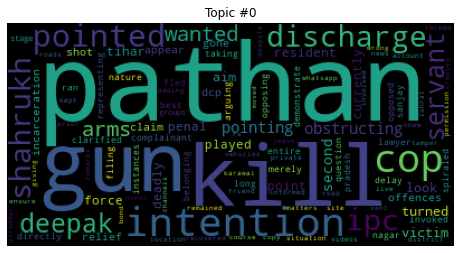

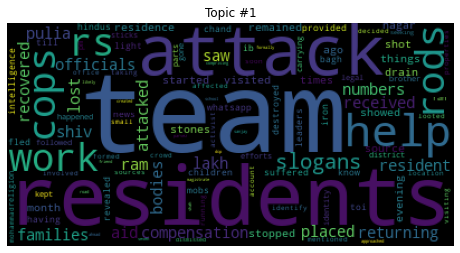

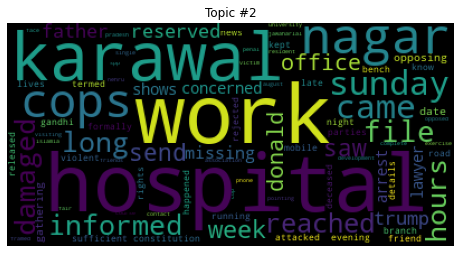

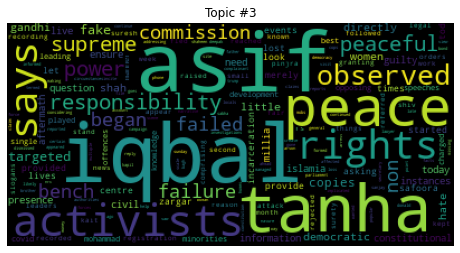

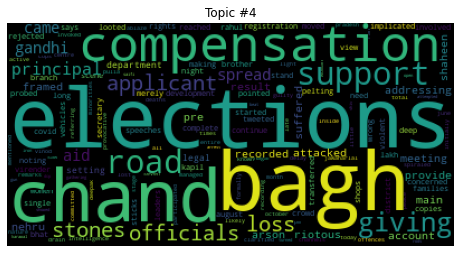

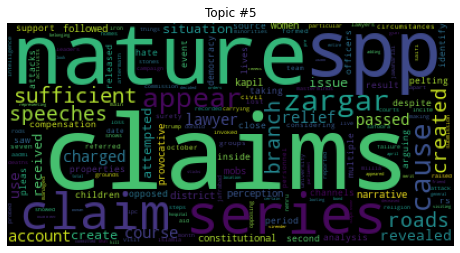

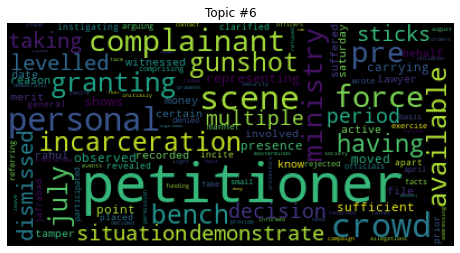

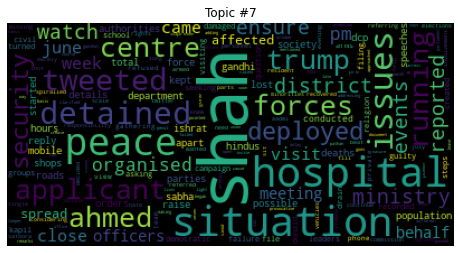

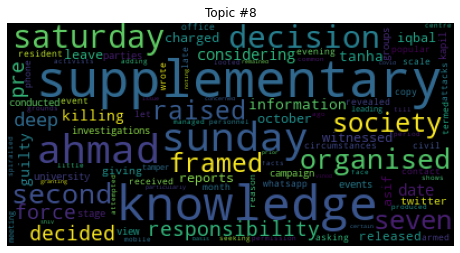

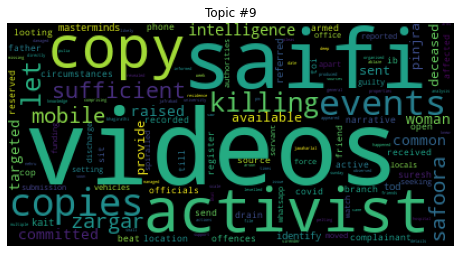

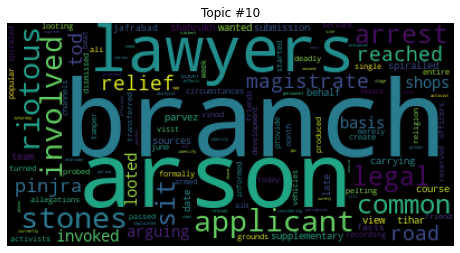

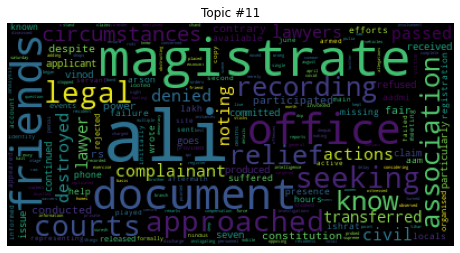

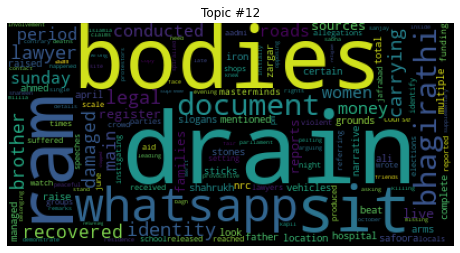

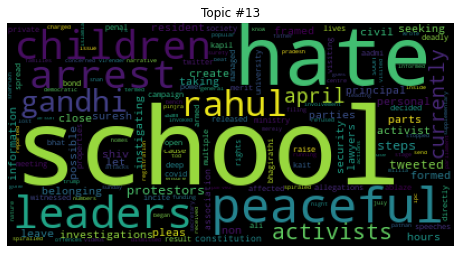

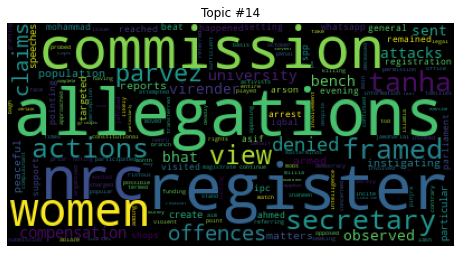

In [ ]:
for t in range(lda_model.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

heatmap- distribution of topics over articles, para level modelling

In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Then, I looked at the bigrams and trigrams from the text. I joined them using underscore and replaces the bi, trigram phrases in the text using the underscored words. Then, I tried topic modelling the text

## Bi and Trigrams

In [ ]:
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# # Importing libraries
# import re
# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# import pandas as pd

# # Input the file
# # txt1 = []
# # with open('C:\\Users\\DELL\\Desktop\\MachineLearning1.txt') as file:
# # 	txt1 = file.readlines()

# # Preprocessing
# def remove_string_special_characters(s):
	
# 	# removes special characters with ' '
# 	stripped = re.sub('[^a-zA-z\s]', '', s)
# 	stripped = re.sub('_', '', stripped)
	
# 	# Change any white space to one space
# 	stripped = re.sub('\s+', ' ', stripped)
	
# 	# Remove start and end white spaces
# 	stripped = stripped.strip()
# 	if stripped != '':
# 			return stripped.lower()
		
# # Stopword removal
# stop_words = set(stopwords.words('english'))
# for i, line in enumerate(text):
# 	text[i] = ' '.join([x for
# 		x in nltk.word_tokenize(line) if
# 		( x not in stop_words )])
	
# # Getting trigrams
# vectorizer = CountVectorizer(ngram_range = (3,3))
# X1 = vectorizer.fit_transform(text)
# features = (vectorizer.get_feature_names_out())
# print("\n\nFeatures : \n", features[0:])
# # print("\n\nX1 : \n", X1.toarray())

# # Applying TFIDF
# vectorizer = TfidfVectorizer(ngram_range = (3,3))
# X2 = vectorizer.fit_transform(text)
# scores = (X2.toarray())
# # print("\n\nScores : \n", scores)

# # Getting top ranking features
# sums = X2.sum(axis = 0)
# data1 = []
# for col, term in enumerate(features):
# 	data1.append( (term, sums[0,col] ))
# ranking = pd.DataFrame(data1, columns = ['term','rank'])
# words = (ranking.sort_values('rank', ascending = False))
# print ("\n\nWords head : \n", words.head(20))

In [ ]:
# text=pd.concat([toi, theHindu])
# text=list(text)
# text

In [ ]:
from nltk.corpus import stopwords
stoplist = stopwords.words('english') + ['though']

from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(3,3))
# matrix of ngrams
ngrams = c_vec.fit_transform(text)
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'trigram'})

df_ngram.loc[:20]

,frequency,trigram
0,44,north east delhi
1,38,additional sessions judge
2,30,citizenship amendment act
3,29,delhi high court
4,25,unlawful activities prevention
5,25,activities prevention act
6,23,east delhi riots
7,22,sessions judge amitabh
8,22,northeast delhi riots
9,22,judge amitabh rawat


In [ ]:
from nltk.corpus import stopwords
stoplist = stopwords.words('english') + ['though']

from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(2,2))
# matrix of ngrams
ngrams = c_vec.fit_transform(text)
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram'})

df_ngram.loc[:20]

,frequency,bigram
0,109,delhi riots
1,106,delhi police
2,63,northeast delhi
3,50,high court
4,49,north east
5,47,new delhi
6,47,east delhi
7,41,february 2020
8,39,additional sessions
9,38,sessions judge


In [ ]:
trig=['north_east_delhi', 'additional_sessions_judge', 'citizenship_amendment_act', 'delhi_high_court', 'east_delhi_riots', 'unlawful_activities_prevention_act'
        , 'special_public_prosecutor', 'former_jnu_student', 'delhi_riot', 'delhi_police', 'northeast_delhi', 'high_court', 'new_delhi','east_delhi']

In [ ]:
for i in trig:
  text1= text1.lower().replace(re.sub('_', " ", i), i)

In [ ]:
processed_text = []
processed_text.append(preprocess(text1))

In [ ]:
dictionary = gensim.corpora.Dictionary(processed_text)

In [ ]:
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n= 100000)

In [ ]:
dictionary.keys()

In [ ]:
bow_corpus = [dictionary.doc2bow(article) for article in processed_articles]

In [ ]:
lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 15, 
                                   id2word = dictionary,                                    
                                   passes = 50,
                                   workers = 8)

In [ ]:
for t in range(lda_model.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

In [ ]:
# !pip install top2vec
# !pip install top2vec[sentence_encoders]
# !pip install top2vec[sentence_transformers]
# !pip install top2vec[indexing]

In [ ]:
# from top2vec import Top2Vec

# model = Top2Vec(text)

In [ ]:
# model.get_num_topics()

In [ ]:
# topic_words, word_scores, topic_nums = model.get_topics(77)

In [ ]:
# #Articles related to Delhi riots from The Hindu and ToI
# links=[]
# titles=[]
# for item in dictionary['articles']:
#   if item['source']['title']=='The Hindu' or item['source']['title']=='Times of India':
#     links.append(item['link'])
#     titles.append(item['title'])
#   for subs in item['sub_articles']:
#     if subs['publisher']== 'The Hindu' or subs['publisher']== "Times of India" :
#       links.append('url')
#       titles.append('title')

In [ ]:
# dictionary['articles'][0]['source']['title']

Finally, I visualized the NER tags. The dimension of the vectors of NER tags was reduced using TSNE and they were plotted using plotly.

##Vector visualtization

In [ ]:
# import spacy
# nlp = spacy.load("en_core_web_sm")

In [ ]:
doc = nlp((text1))
temp=([(entity.text, entity.label_, entity.vector) for entity in doc.ents])

In [ ]:
l=[]
for entry in temp:
  if entry[0] not in [x[0] for x in l]:
    l.append(entry)

In [ ]:
(l)

In [ ]:
x=[]
for i in l:
  x.append(i[2])

In [ ]:
x

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
X = np.array(x)
X_embedded = TSNE(perplexity=20, learning_rate='auto', init='random').fit_transform(X)

In [ ]:
X_embedded

array([[-38.03051  ,  17.70336  ],
       [ 48.360596 ,  26.41523  ],
       [-17.964851 ,   0.3539568],
       ...,
       [ -8.0245075,   8.095873 ],
       [-10.665793 ,   3.057064 ],
       [-38.88866  ,   2.5639193]], dtype=float32)

In [ ]:
x=[]
y=[]
for i in X_embedded:
  x.append(i[0])
  y.append(i[1])

In [ ]:
# list(zip(x,y))

In [ ]:
df= pd.DataFrame(X_embedded, columns=['x', 'y'])

In [ ]:
df

In [ ]:
df['text']= [x[0] for x in l]

In [ ]:
df['label']= [x[1] for x in l]

In [ ]:
df

In [ ]:
import plotly.express as px 
fig = px.scatter(df, x='x', y='y', hover_data=['text'], color='label')
fig.write_html("trial.html")
fig.show()

##Google News scraping using pyGoogleNews package

In [ ]:
# gn = GoogleNews(lang = 'en', country = 'In')
# # search for the best matching articles that mention MSFT and 
# # do not mention AAPL (over the past 6 month)
# search = gn.search('Delhi riots', when = '1y')
# (search['entries'])

In [ ]:
# len(search['entries'])

99

In [ ]:
# articles=[]
# for items in search['entries']:
#   if (items['source']['title']=="The Hindu" or items['source']['title']== "Times of India"):
#     articles.append(items)

In [ ]:
# link=[]
# title=[]
# for item in articles:
#   link.append(item['link'])
#   title.append(item['title'])

In [ ]:
# (title)

['High Court says Delhi riots were pre-planned - The Hindu',
 'Delhi riots: 12 charged with murder of man - Times of India',
 '2020 Delhi riots: Police trying to communalise case, accused tells court - Times of India',
 'Northeast Delhi riots: Wounds still raw, victims face struggle for survival - Times of India',
 'Two years on, chargesheet in Delhi riots case says ‘no evidence’ against BJP leader - The Hindu',
 'Delhi riots: Police opposes Umar Khalid’s bail, says ‘idea was to bring govt to knees, destabilise democracy’ - The Hindu',
 'Delhi riots case: ‘Anti-CAA protest secular, charge sheet communal’, Umar Khalid tells court - The Hindu',
 "Delhi riots: Amit Shah congratulates police for 'fair probe' - Times of India",
 "Delhi riots: Gokulpuri drain struggles to shrug off 'drain of death' tag - Times of India",
 'Northeast Delhi riots victim gets buffalo, is Bhainswali Amma once again - Times of India',
 'Delhi riots case: HC pulls up police for ‘casually’ invoking anti-terror law 